Problem Statement: One of India's top most cosmetic product company has a wide range of sales spread across different parts of the country. The given data is the sales record of approximately ​3years​. Analyze the data for some ​good actionable insights which can increase their demand planning, warehouse planning, pricing of products which in turn can increase their revenue. 

Hypothesis:

1.   More the quantity sold, more would be the net revenue
2.   Revenue generated in major cities would be more
3.   Seasons may affect the sales based on products
4.   Higher selling of a product at a site, leads to higher demand and net sales

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Hackathon_Data_May6.csv to Hackathon_Data_May6.csv


In [0]:
import pandas as pd
import io
train = pd.read_csv(io.BytesIO(uploaded['Hackathon_Data_May6.csv']))

In [0]:
data = train.copy()

In [4]:
data.shape

(34950, 20)

In [5]:
data.head()

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-08-01


In [6]:
data.describe()

,Year,Month,Category Name ID,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Master Category,Rank
count,34950.000000,34950.000000,34950.000000,34950.000000,34950.000000,3.495000e+04,34950.000000,3.495000e+04,34950.000000,34950.000000,34950.000000,34950.000000
mean,2018.238369,6.592704,5.650329,648.123836,170.624435,6.820406e+04,0.828097,6.882029e+04,267.888050,105.565728,7.601373,27.729843
std,0.890129,3.480924,2.304732,1692.562838,151.156814,1.311879e+05,7.367449,1.316258e+05,229.221730,140.720941,4.108985,14.634914
min,2017.000000,1.000000,0.000000,1.000000,27.000000,2.800000e+01,0.000000,2.800000e+01,33.846154,1.000000,0.000000,1.000000
25%,2018.000000,4.000000,5.000000,113.000000,95.000000,1.524025e+04,0.000000,1.536900e+04,153.333333,40.000000,4.000000,15.000000
50%,2018.000000,7.000000,7.000000,275.000000,120.000000,3.379350e+04,0.000000,3.412550e+04,190.000000,80.000000,10.000000,28.000000
75%,2019.000000,10.000000,7.000000,616.000000,178.000000,7.255300e+04,0.000000,7.340275e+04,295.000000,100.000000,11.000000,41.000000
max,2020.000000,12.000000,8.000000,52226.000000,1023.000000,5.448294e+06,325.000000,5.448294e+06,1500.000000,700.000000,12.000000,52.000000


Data Cleaning

In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

ParentSKU               0
Site Id                 0
Year                    0
Month                   0
Category Name ID        0
Unit                    0
Qty                     0
Price                   0
Net Sales calculated    0
Cash Discount           0
Amount to Customer      0
MRP                     0
Pack Size               0
Pack Unit Id            0
State                   0
Zone                    0
Master Category         0
Size                    0
Rank                    0
Date                    0
dtype: int64

In [9]:
data.columns

Index(['ParentSKU', 'Site Id', 'Year', 'Month', 'Category Name ID', 'Unit',
       'Qty', 'Price', 'Net Sales calculated', 'Cash Discount',
       'Amount to Customer', 'MRP', 'Pack Size', 'Pack Unit Id', 'State',
       'Zone', 'Master Category', 'Size', 'Rank', 'Date'],
      dtype='object')

In [10]:
data['State'].value_counts()

DL    34950
Name: State, dtype: int64

In [0]:
data.drop(columns=['State'],axis=1,inplace=True) #state has same value for all, so its meaningless

In [12]:
data['Unit'].value_counts()

NO     34949
PCS        1
Name: Unit, dtype: int64

In [0]:
data.drop(columns=['Unit'],axis=1,inplace=True) #Unit has same value for all, so its meaningless

In [0]:
data.drop(columns=['Cash Discount'],axis=1,inplace=True) 

In [15]:
data.dtypes

ParentSKU                object
Site Id                  object
Year                      int64
Month                     int64
Category Name ID          int64
Qty                     float64
Price                     int64
Net Sales calculated      int64
Amount to Customer        int64
MRP                     float64
Pack Size               float64
Pack Unit Id             object
Zone                     object
Master Category           int64
Size                     object
Rank                      int64
Date                     object
dtype: object

Univariate Analysis

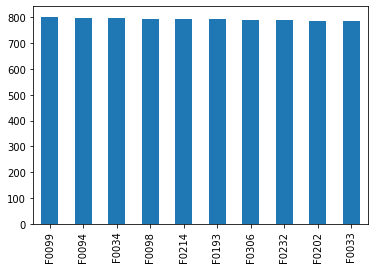

In [16]:
data['ParentSKU'].value_counts().head(10).plot(kind='bar')

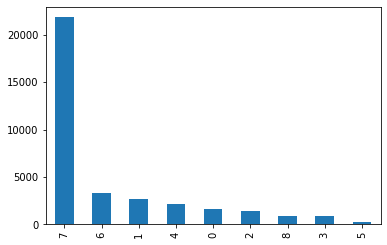

In [17]:
data['Category Name ID'].value_counts().plot(kind='bar')

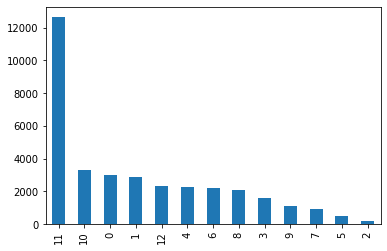

In [18]:
data['Master Category'].value_counts().plot(kind='bar')

In [19]:
data['Site Id'].value_counts()

DELMDK        1607
MUMBAI        1600
BANGALORE     1595
MOHALI        1592
PUNE          1589
GHAZIABAD     1587
LUCKNOW       1577
CHENNAI       1576
SECUNDRBAD    1562
AHMEDABAD     1561
KOLKATA2      1557
VIJAYAWADA    1539
INDORE        1529
JAIPUR        1519
KOCHI         1519
GUWAHATI      1492
PATNA         1490
RAIPUR        1485
RANCHI        1485
JAMMU         1482
BHUBANESWR    1425
DEHRADUN      1363
HRDFACTORY     615
GURGAON        541
KOLKATA         63
Name: Site Id, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


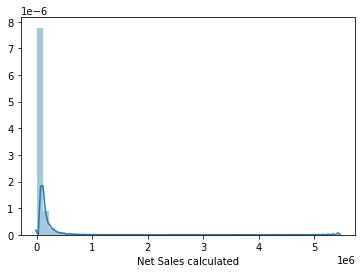

In [21]:
sns.distplot(data['Net Sales calculated'])

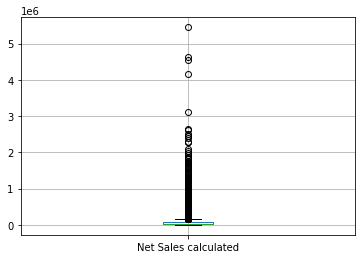

In [22]:
data.boxplot(column=['Net Sales calculated'])

In [23]:
site_ind = 0
site_ind = data.loc[data['Net Sales calculated'] > 100000].index
data = data.drop(site_ind)
data.shape

(28993, 17)

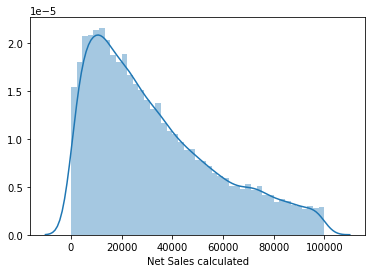

In [24]:
sns.distplot(data['Net Sales calculated'])

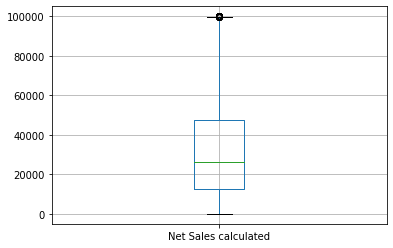

In [25]:
data.boxplot(column=['Net Sales calculated'])

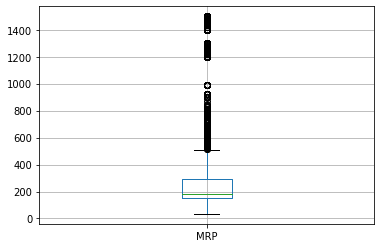

In [26]:
data.boxplot(column=['MRP'])

In [27]:
site_ind = 0
site_ind = data.loc[data['MRP'] > 500].index
data = data.drop(site_ind)
data.shape

(27542, 17)

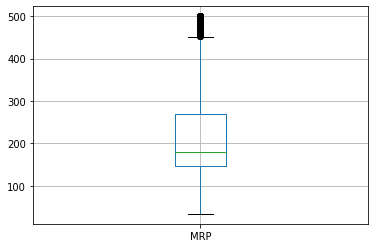

In [28]:
data.boxplot(column=['MRP'])

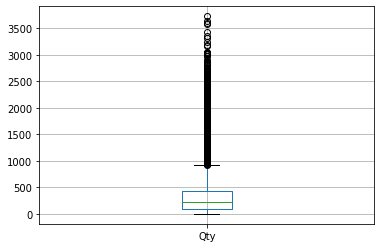

In [29]:
data.boxplot(column=['Qty'])

In [30]:
site_ind = 0
site_ind = data.loc[data['Qty'] > 1500].index
data = data.drop(site_ind)
data.shape


(27075, 17)

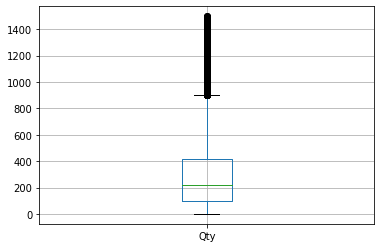

In [31]:
data.boxplot(column=['Qty'])

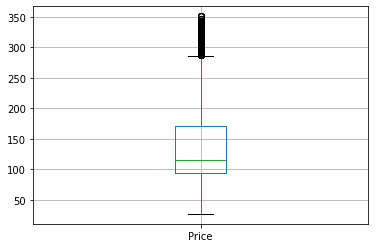

In [32]:
data.boxplot(column=['Price'])

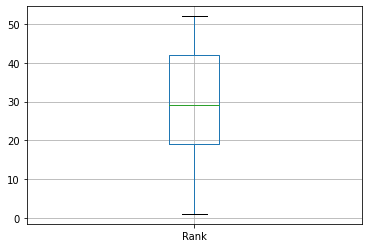

In [33]:
data.boxplot(column=['Rank'])

There is too much noise in the dataset, Lets go through bivariate analysis  data to have better understanding of outliers

Bivariate Analysis

effect of sites on net sales

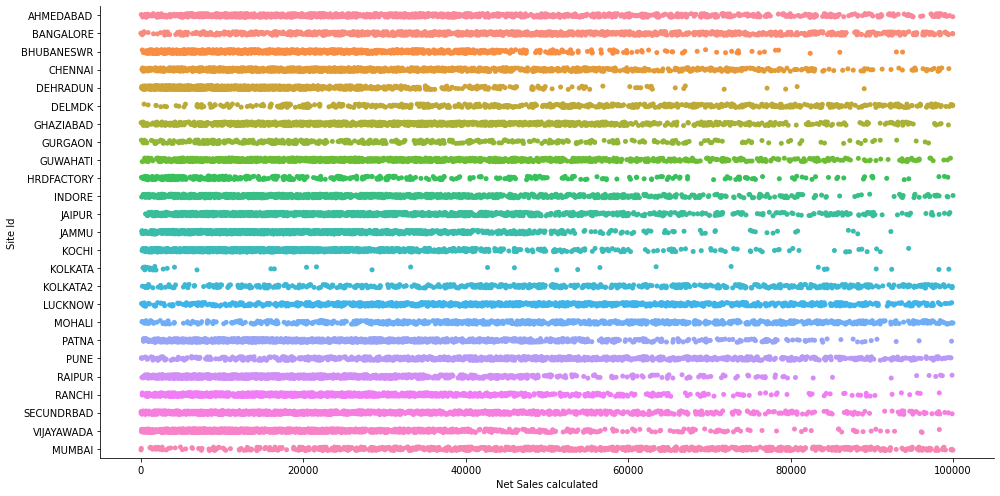

In [34]:
sns.catplot(x="Net Sales calculated", y="Site Id", data=data, height=7, aspect=2)

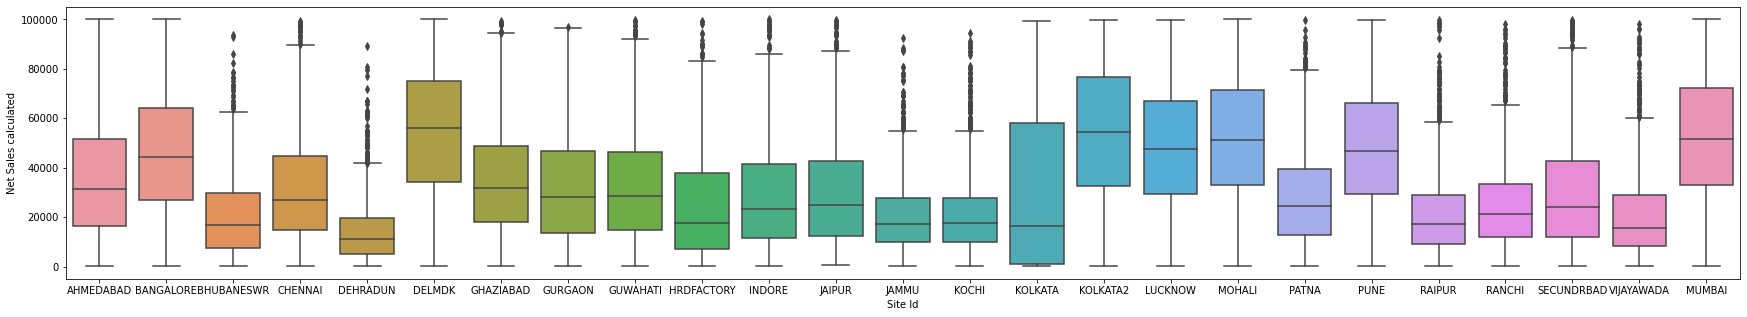

In [35]:
plt.figure(figsize=(30,5))
sns.boxplot(x='Site Id', y='Net Sales calculated', data=data)

from the above boxplot, we see DELMDK,KOLKATA2 followed by Mumbai has overall highest net sales
Pune, bangalore, Mohali are also good revenue generating sides this proves hypothesis 2

more revenue means more demand of products, hence more products should be kept in above revenue generating sites. to know exactly what type of products is in demand, further site specific investigation needs to be done

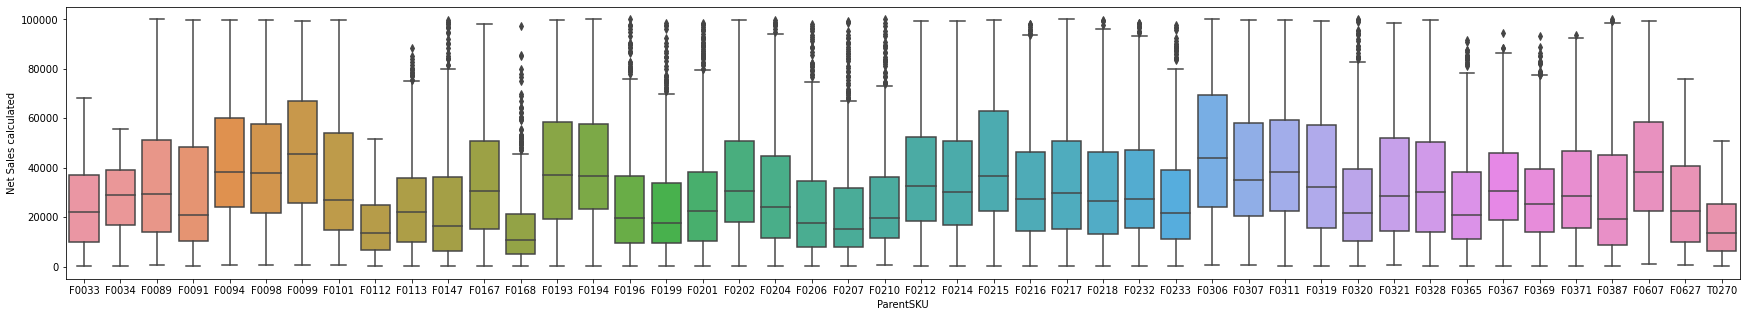

In [36]:
plt.figure(figsize=(30,5))
sns.boxplot(x='ParentSKU', y='Net Sales calculated', data=data)

Overall, product F0306 is the most revenue contributing product

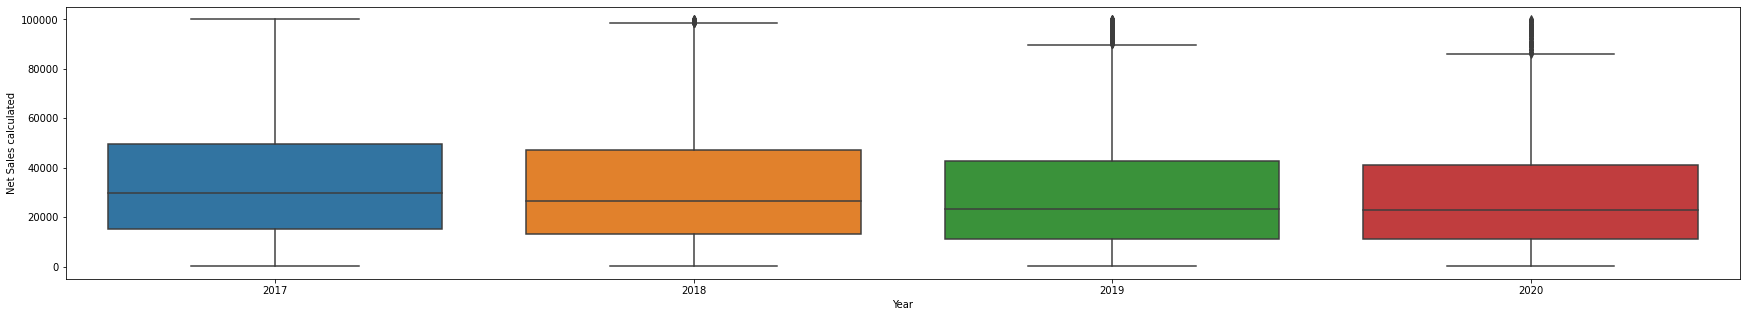

In [37]:
plt.figure(figsize=(30,5))
sns.boxplot(x='Year', y='Net Sales calculated', data=data)

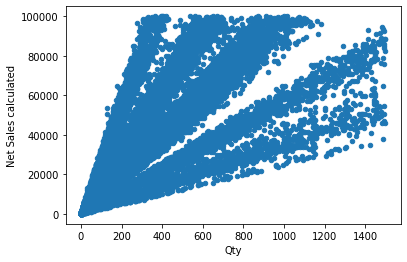

In [38]:
year1 = pd.concat([data['Net Sales calculated'], data['Qty']], axis=1)
year1.plot.scatter(x='Qty', y='Net Sales calculated');

This shows the hypothesis where the  netsales increases with the increase in quantity sold is true, however there is linear as well as exponential relationship, need to further investigate the cause

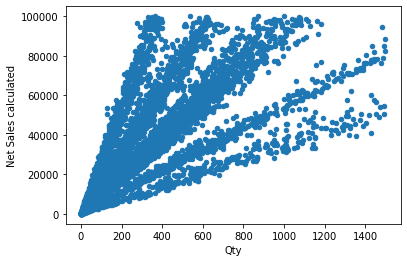

In [39]:
year1 = data.loc[data['Year'] == 2017]
year1 = pd.concat([year1['Net Sales calculated'], year1['Qty']], axis=1)
year1.plot.scatter(x='Qty', y='Net Sales calculated');

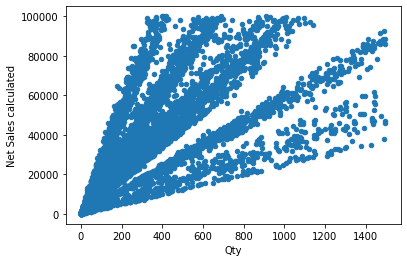

In [40]:
year2 = data.loc[data['Year'] == 2018]
year2 = pd.concat([year2['Net Sales calculated'], year2['Qty']], axis=1)
year2.plot.scatter(x='Qty', y='Net Sales calculated');

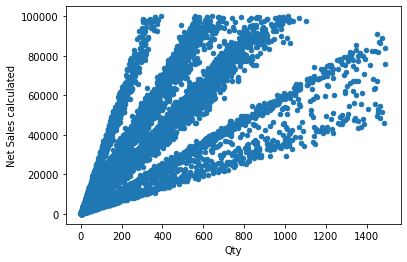

In [41]:
year3 = data.loc[data['Year'] == 2019]
year3 = pd.concat([year3['Net Sales calculated'], year3['Qty']], axis=1)
year3.plot.scatter(x='Qty', y='Net Sales calculated');

so the linear and exponential relationship is there for all the years. Lets check the seasonality of the net sales based on months

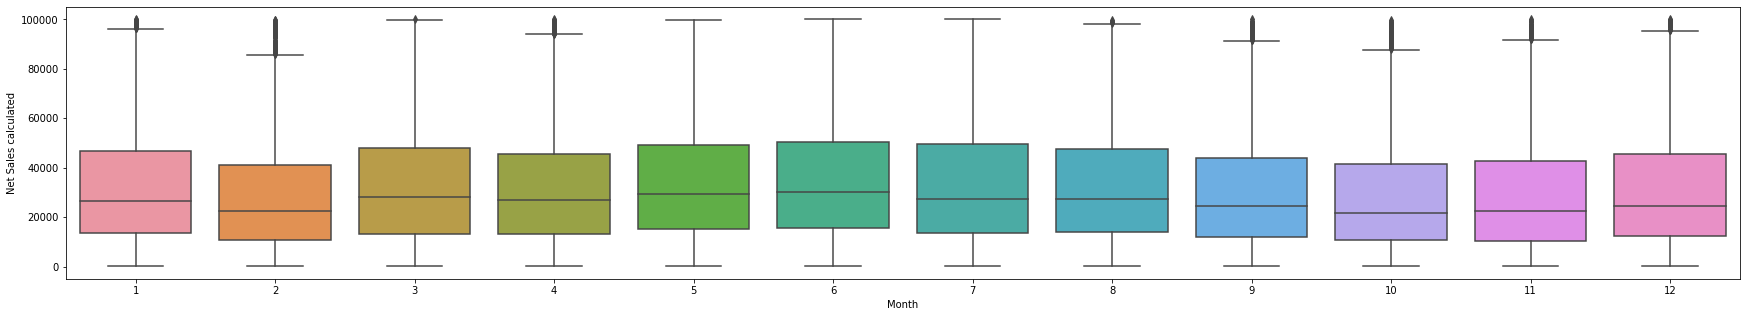

In [42]:
plt.figure(figsize=(30,5))
sns.boxplot(x='Month', y='Net Sales calculated', data=data)

Overall there is no difference on net sales based on seasons, Lets check year wise

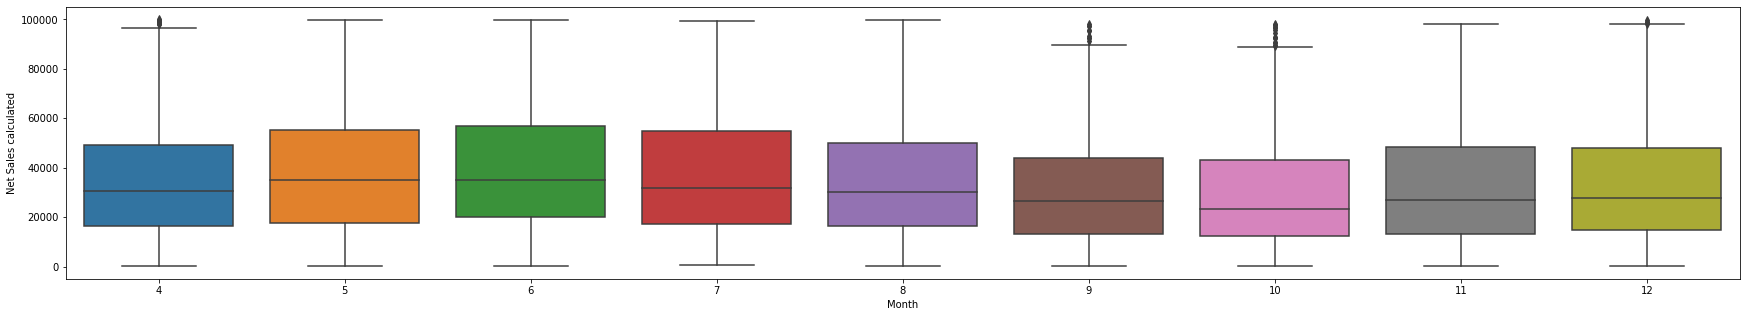

In [43]:
year1 = data.loc[data['Year'] == 2017]
plt.figure(figsize=(30,5))
sns.boxplot(x='Month', y='Net Sales calculated', data=year1)

There is no much impact of seasons on net sales of overall products, will dig deep based on individual products to understand more.

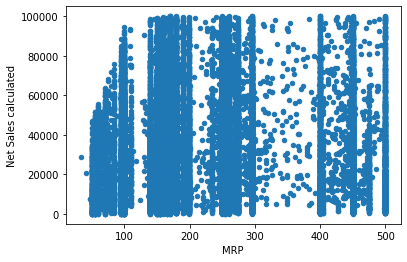

In [44]:
year1 = pd.concat([data['Net Sales calculated'], data['MRP']], axis=1)
year1.plot.scatter(x='MRP', y='Net Sales calculated');

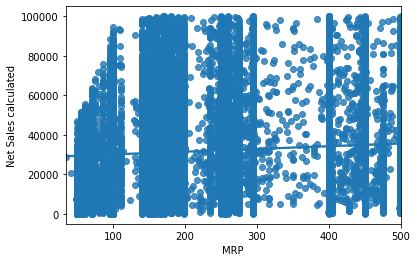

In [45]:
sns.regplot(x="MRP", y="Net Sales calculated", data=data);

MRP doesnt have a linear relationship on net sales

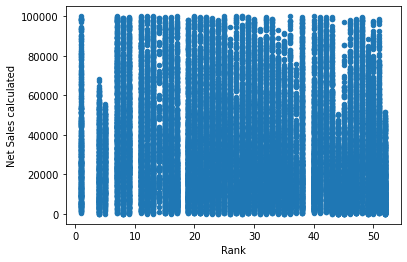

In [46]:
year1 = pd.concat([data['Net Sales calculated'], data['Rank']], axis=1)
year1.plot.scatter(x='Rank', y='Net Sales calculated');

Lets check the net sales based on product category

In [47]:
import numpy as np
train.groupby(['Category Name ID','Master Category']).agg(np.size)

ParentSKU  Site Id  ...   Rank   Date
Category Name ID Master Category                      ...              
0                3                     1586     1586  ...   1586   1586
1                4                     2249     2249  ...   2249   2249
                 5                      484      484  ...    484    484
2                6                     1399     1399  ...   1399   1399
3                7                      891      891  ...    891    891
4                8                     2084     2084  ...   2084   2084
                 10                      22       22  ...     22     22
5                9                      211      211  ...    211    211
6                10                    3274     3274  ...   3274   3274
7                0                     3003     3003  ...   3003   3003
                 1                     2893     2893  ...   2893   2893
                 2                      179      179  ...    179    179
                 6                      776      776  ...    776    776
                 11                   12657    12657  ...  12657  12657
                 12                    2340     2340  ...   2340   2340
8                9                      902      902  ...    902    902

[16 rows x 18 columns]

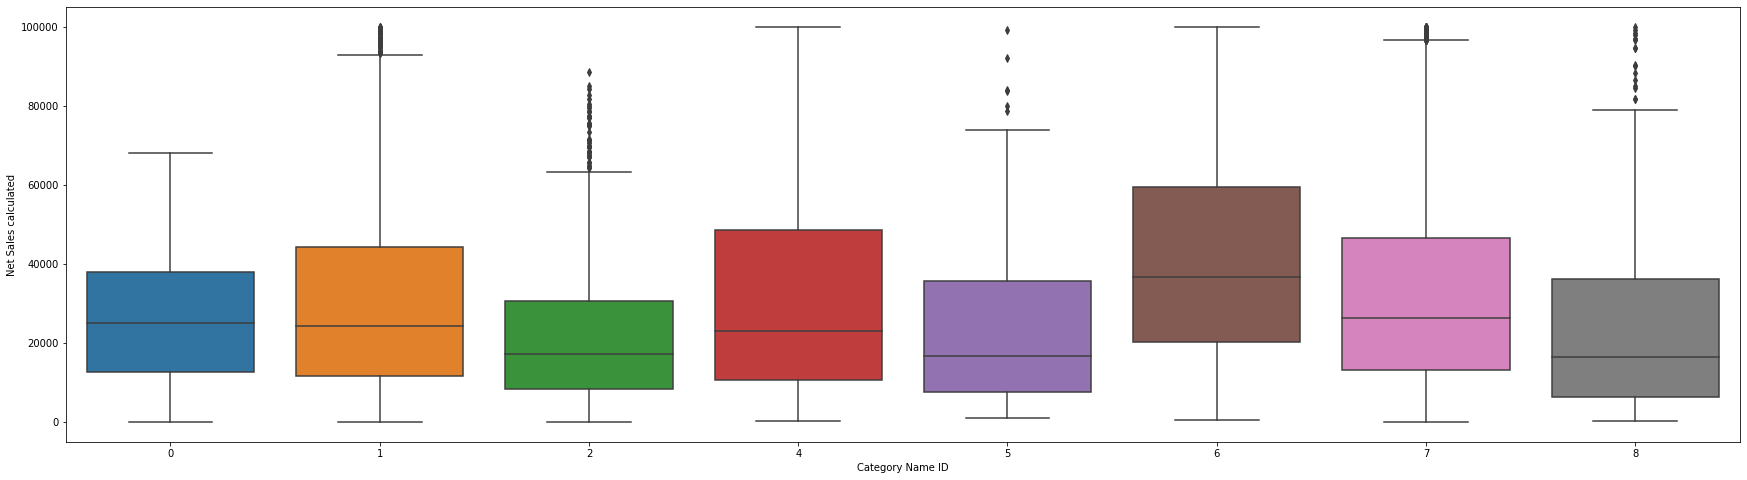

In [48]:
plt.figure(figsize=(30,8))
sns.boxplot(x='Category Name ID', y='Net Sales calculated', data=data)

it seems product belongs to category 6 has highest overall net sales

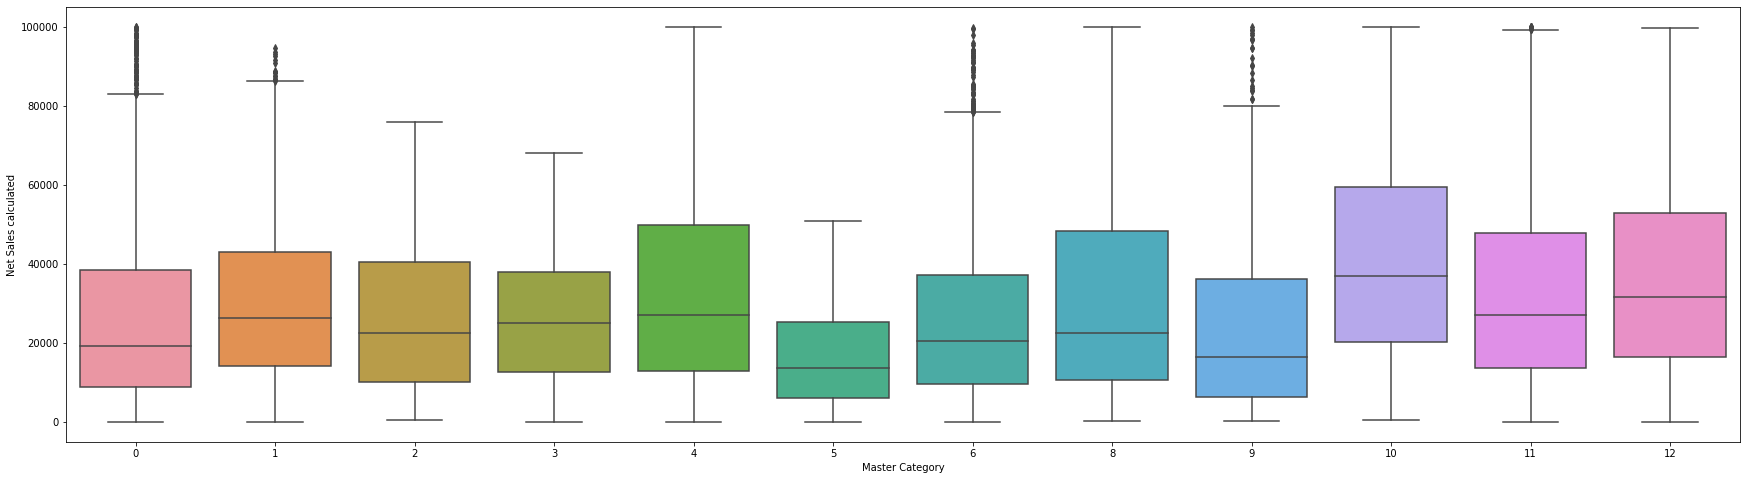

In [49]:
plt.figure(figsize=(30,8))
sns.boxplot(x='Master Category', y='Net Sales calculated', data=data)

In [0]:
df = data.groupby(['Category Name ID','Site Id']).size().reset_index(name='Count')

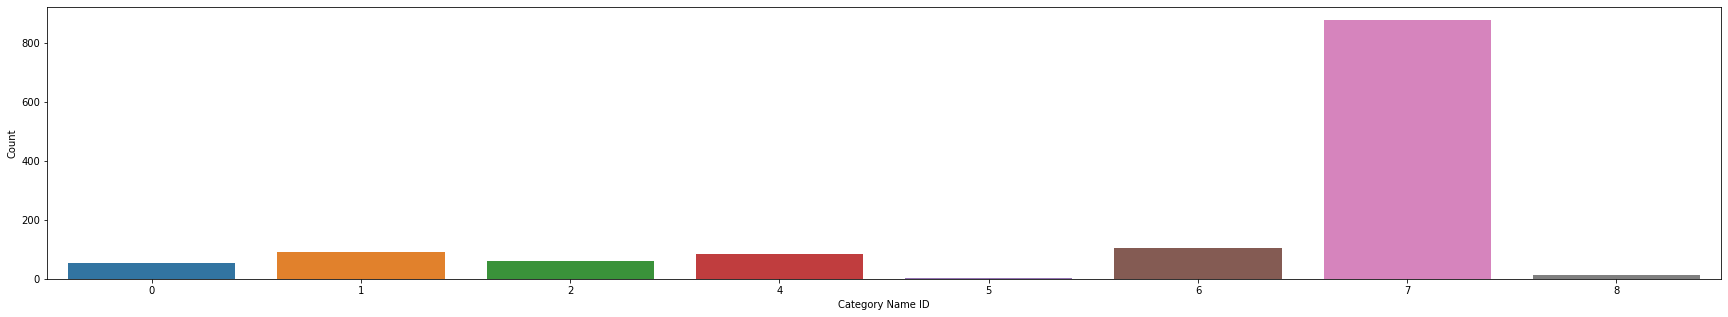

In [51]:
prod = df.loc[df['Site Id'] == 'DEHRADUN']
plt.figure(figsize=(30,5))
sns.barplot(data=prod, x='Category Name ID', y='Count')

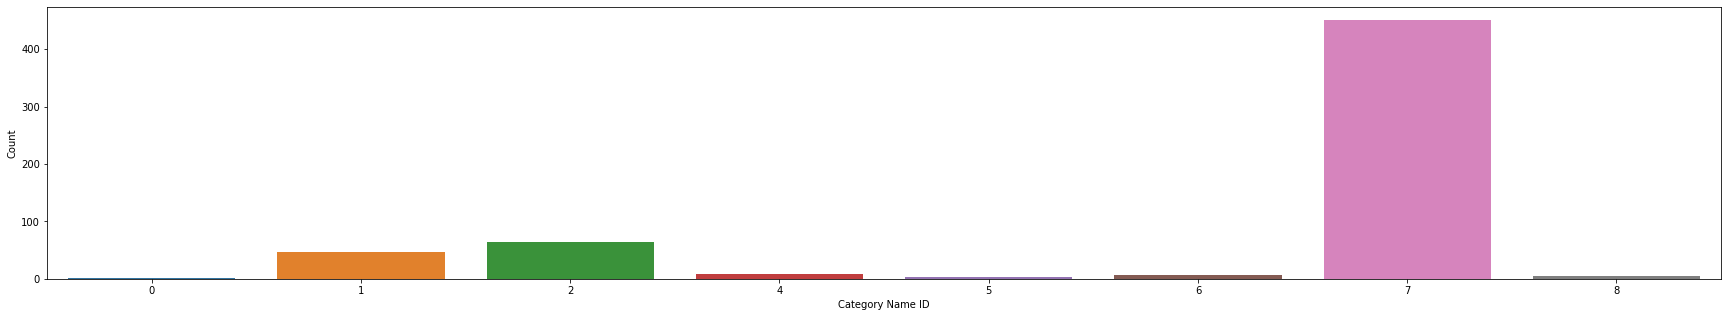

In [52]:
prod = df.loc[df['Site Id'] == 'DELMDK']
plt.figure(figsize=(30,5))
sns.barplot(data=prod, x='Category Name ID', y='Count')

we see, in both lowest sales generated site Dehradun and highest net sales generated site DELMDK, the frequency of category 7 product is more

Multivariate Analysis

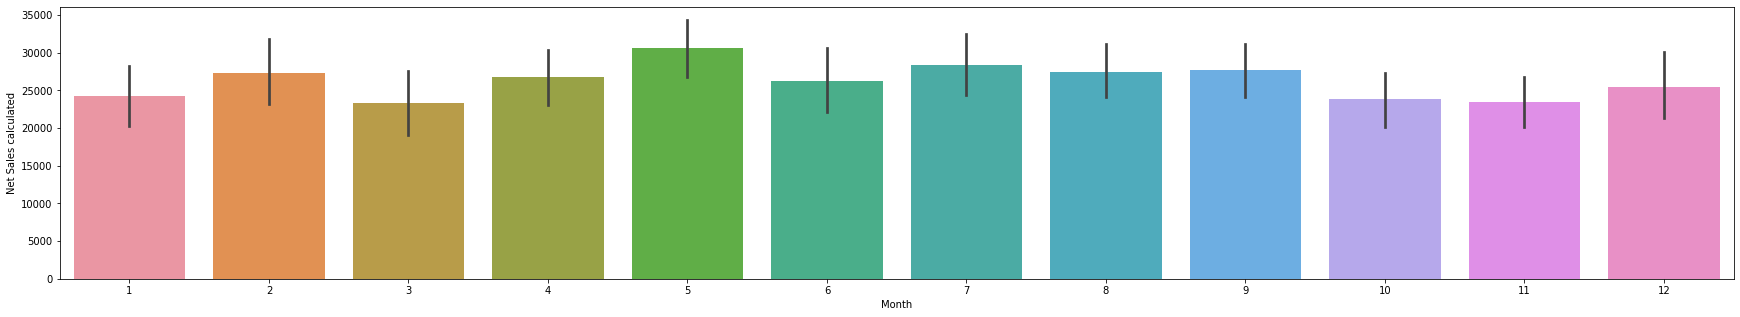

In [53]:
df = data.loc[data['Category Name ID'] == 0]
plt.figure(figsize=(30,5))
sns.barplot(data=df, x='Month', y='Net Sales calculated')

From the above graph, we see seasonality affects the net sales based on categories, the sales is higher in month june and gradually decreases from july to january and increases further in feb. This proves hypothesis 3 and we can get more detailed insights if we drill down from category to products.

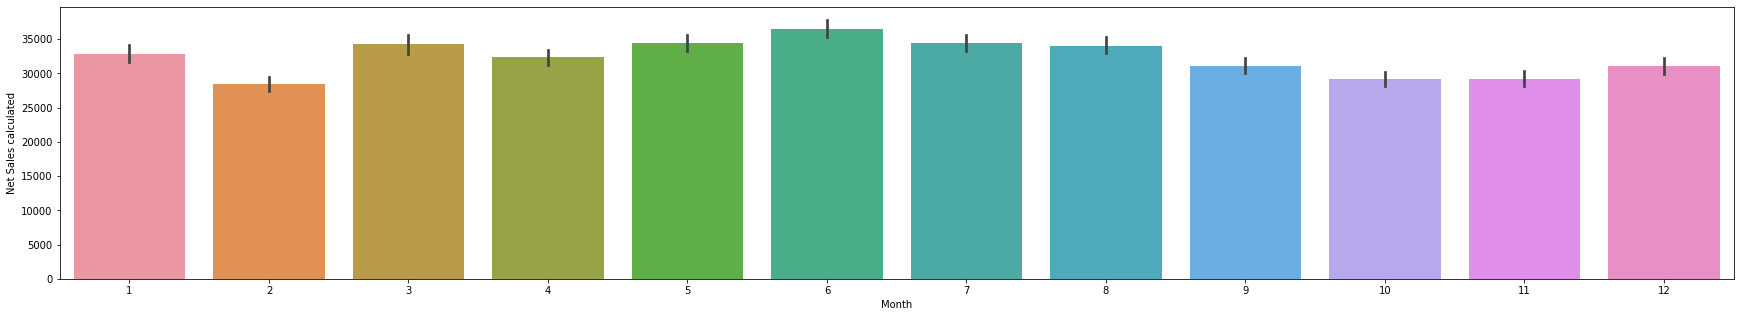

In [54]:
df = data.loc[data['Category Name ID'] == 7]
plt.figure(figsize=(30,5))
sns.barplot(data=df, x='Month', y='Net Sales calculated')

here we see, there is seasonality in category 7 too. Lets see the correlation between the features

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df = data.copy()
df['ParentSKU'] = le.fit_transform(data['ParentSKU'])
df['Site Id'] = le.fit_transform(data['Site Id'])

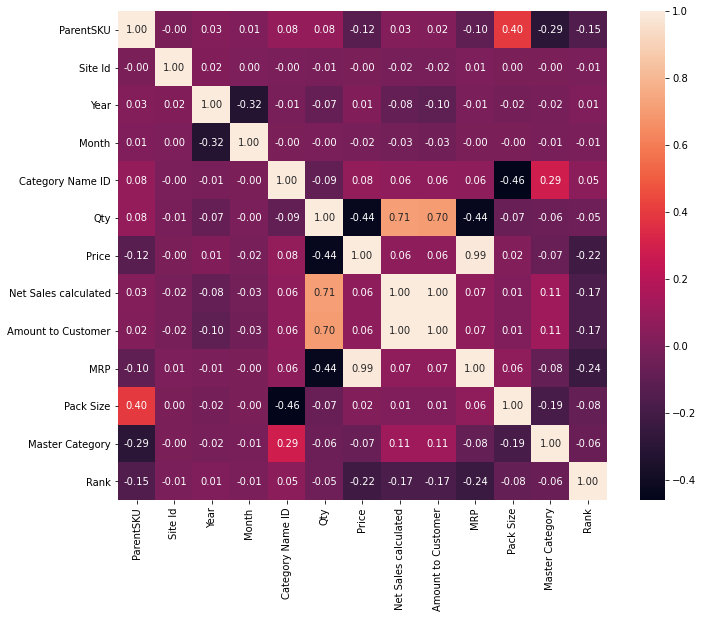

In [56]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True,fmt='.2f');

Net sales calculated and amount to customer is prefectly correlated to each other which is obvious. here qty is highly correlated to net sales, increase in qty increases sales. year has no effect on net sales as we saw earlier the mean net sales is approx same for all the years.

MRP is correlated with Price, even master category is somewhat correlated to category name ID

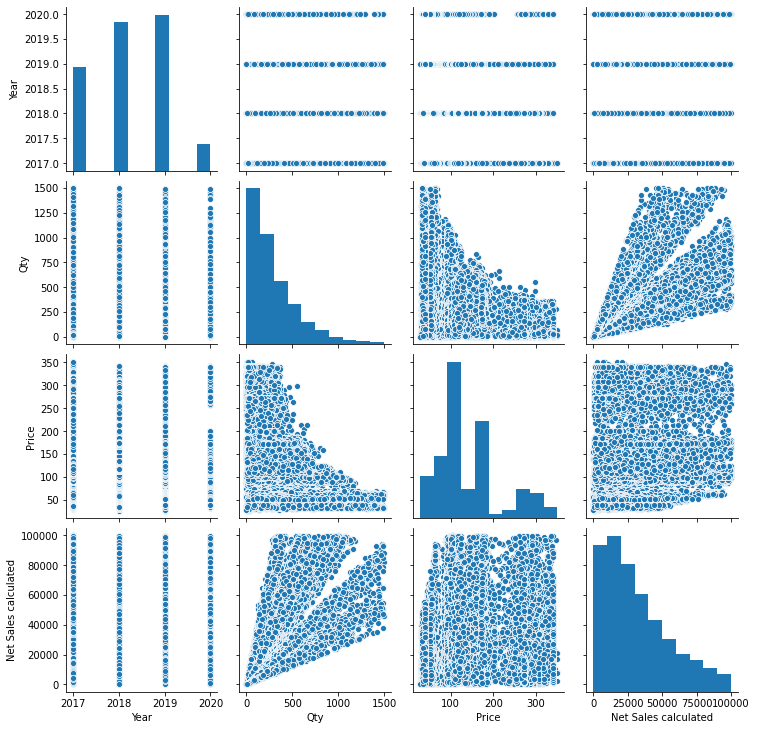

In [80]:
cols = ['ParentSKU','Site Id','Year','Qty','Price','Net Sales calculated']
sns.pairplot(data[cols])

We see as the Quantity increase, the price of product decreases.

Lets take a single site for further investigation, to know the demand of products

In [57]:
df = data.loc[data['Site Id'] == 'AHMEDABAD']
df.shape

(1234, 17)

these are the overall top 10 products at AHMEDABAD site

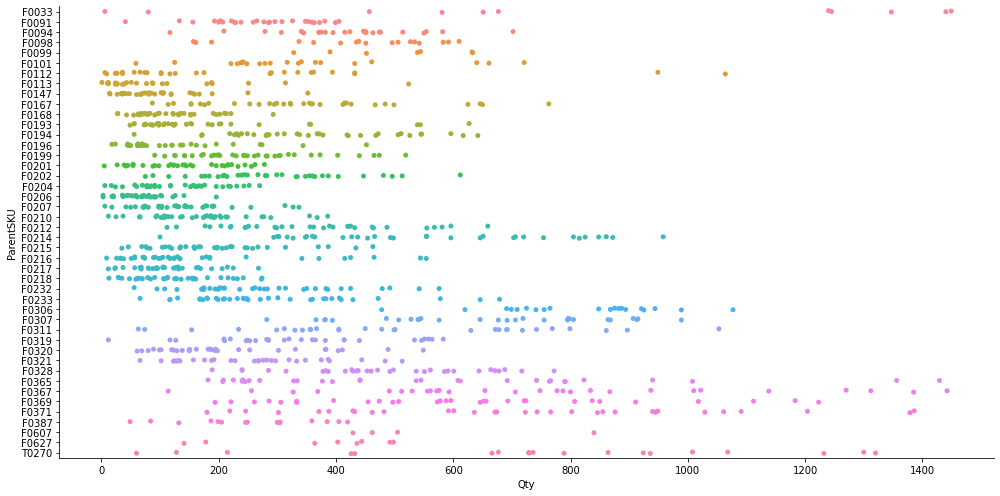

In [60]:
sns.catplot(x="Qty", y="ParentSKU", data=df, height=7, aspect=2)

there are outliers in the QTy sold, lets remove the outliers in qty

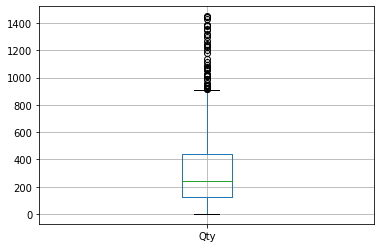

In [62]:
df.boxplot(column=['Qty'])

In [65]:
df.loc[df['Qty'] > 1000].shape

(33, 17)

In [66]:
site_ind = 0
site_ind = df.loc[df['Qty'] > 1000].index
df = df.drop(site_ind)
df.shape

(1201, 17)

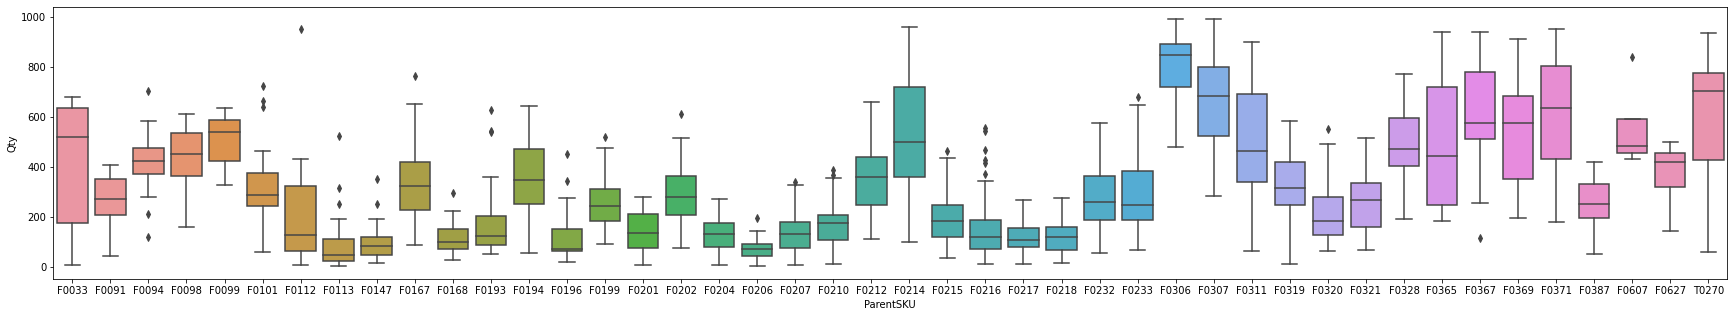

In [68]:
plt.figure(figsize=(30,5))
sns.boxplot(x='ParentSKU', y='Qty', data=df)

F0306 is the most selling product at Ahmedabad site. Lets look at the data year wise

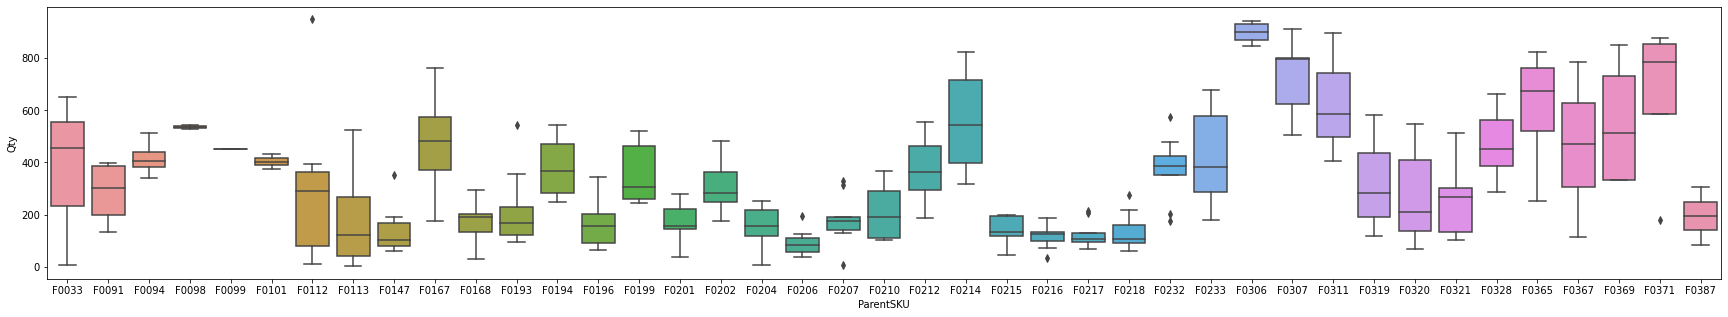

In [69]:
year1 = df.loc[df['Year'] == 2017]
plt.figure(figsize=(30,5))
sns.boxplot(x='ParentSKU', y='Qty', data=year1)

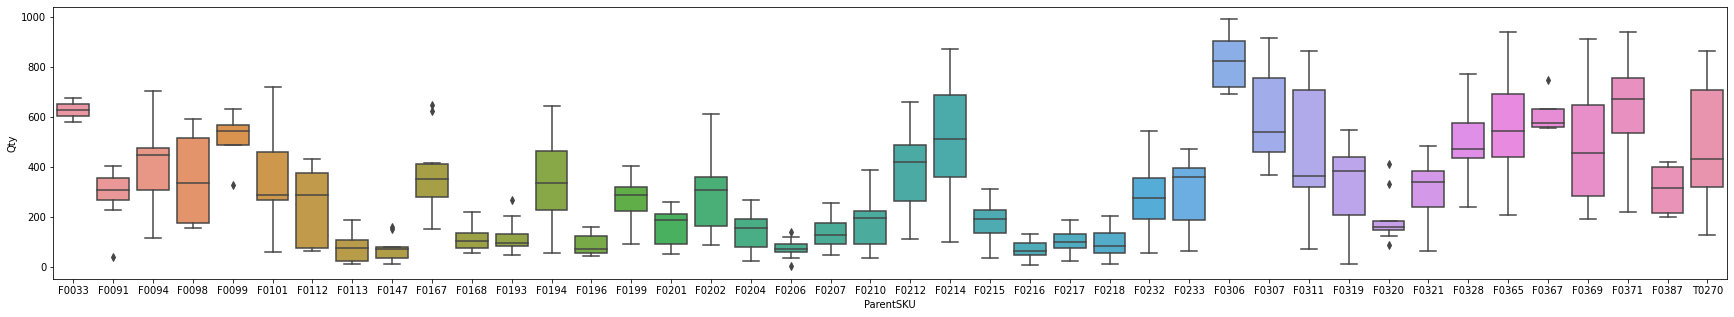

In [70]:
year1 = df.loc[df['Year'] == 2018]
plt.figure(figsize=(30,5))
sns.boxplot(x='ParentSKU', y='Qty', data=year1)

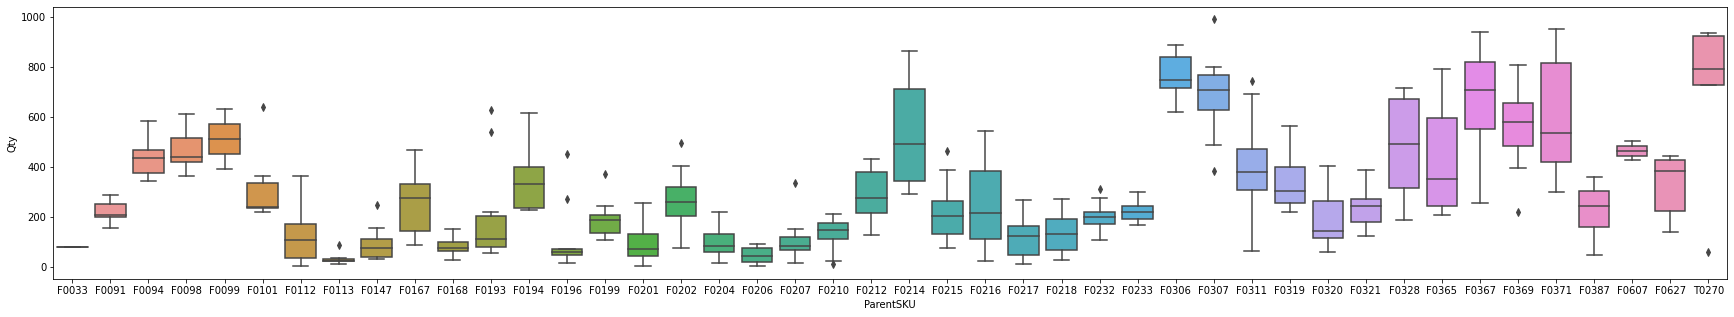

In [71]:
year1 = df.loc[df['Year'] == 2019]
plt.figure(figsize=(30,5))
sns.boxplot(x='ParentSKU', y='Qty', data=year1)

from 2017 to 2018, F0306 was the highest selling product, which was overtaken by T0270 in 2019. so T0270 cannibalized the sales of F0306 in 2019

Lets check seasonality for product F0306

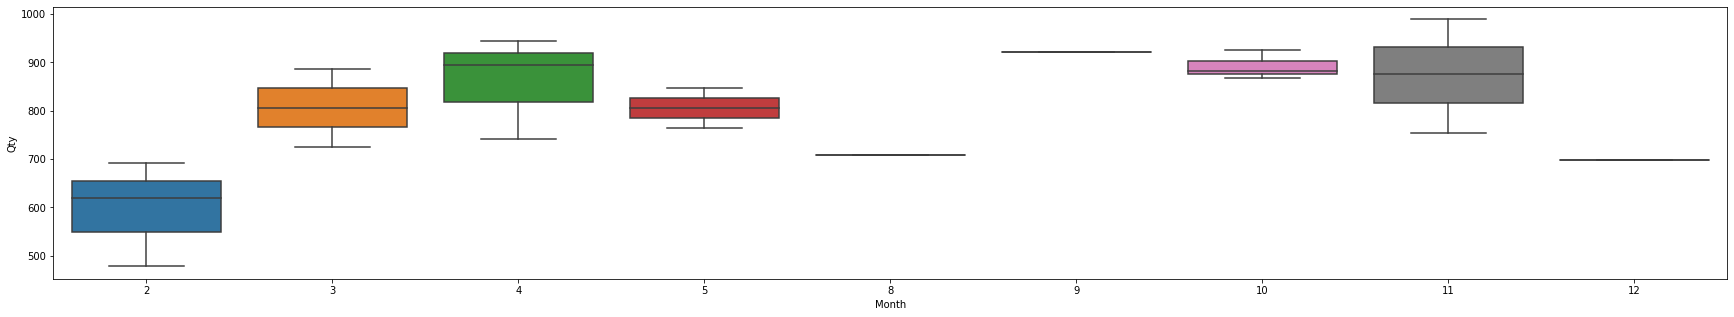

In [74]:
year1 = []
year1 = df.loc[df['ParentSKU'] == 'F0306']
plt.figure(figsize=(30,5))
sns.boxplot(x='Month', y='Qty', data=year1)

we see a cycle in the qty sold based on months, though i dont find this accurate because of small dataset.

As there is demand in F0306 product and there is increase  demand for T0270, both products can be stored in large quantity at Ahmedabad site

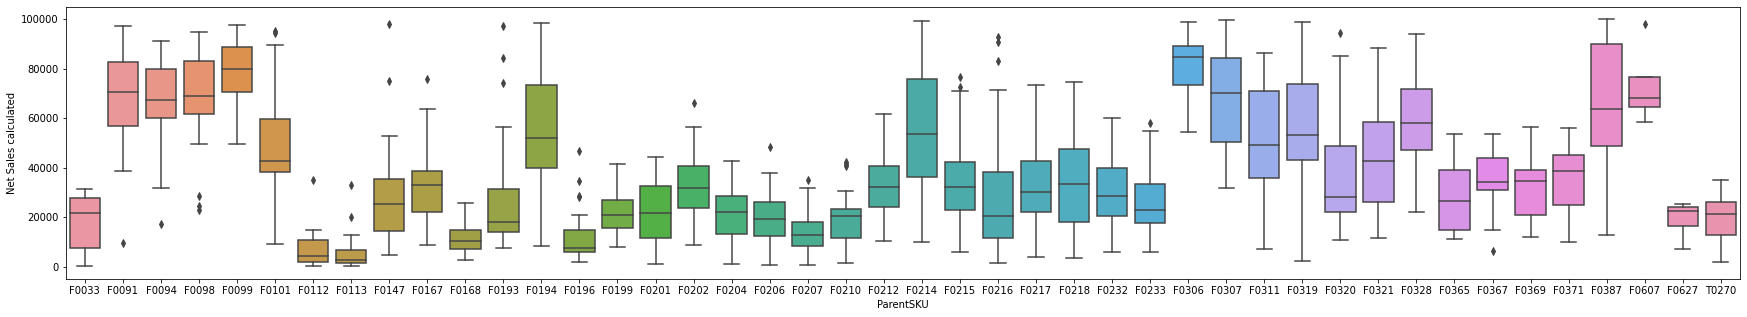

In [75]:
plt.figure(figsize=(30,5))
sns.boxplot(x='ParentSKU', y='Net Sales calculated', data=df)

we see, F0306 has the highest net sales, this proves the hypothesis 4, Higher selling of a product at a site, leads to higher demand and net sales

Lets see how pricing affects the net sales for product F0306 at different sites



In [81]:
df = data.loc[data['ParentSKU'] == 'F0306']
df.shape

(539, 17)

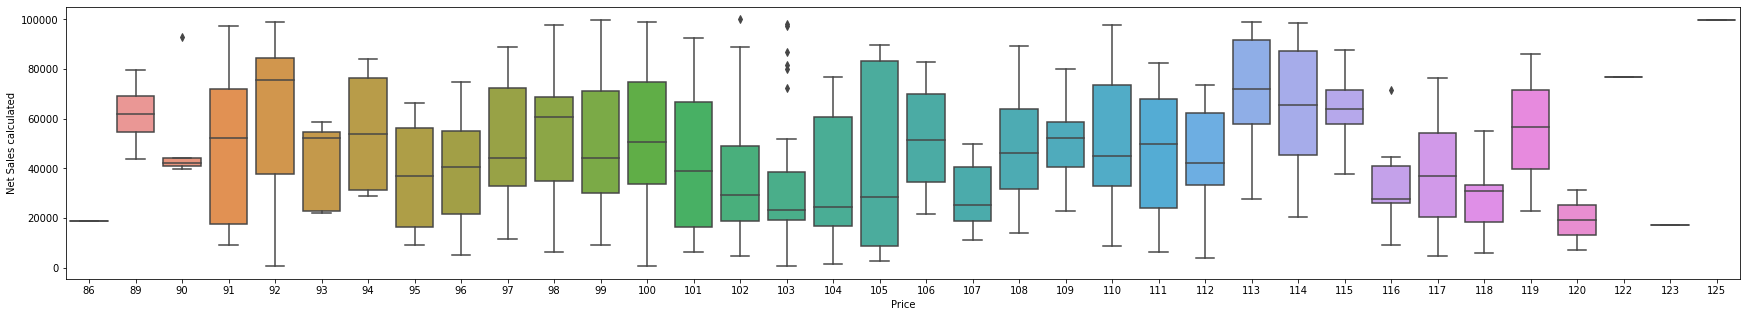

In [84]:
plt.figure(figsize=(30,5))
sns.boxplot(x='Price', y='Net Sales calculated', data=df)

the net sales is highest when the price of product F0306 is 92, but we see high net sales also when price is 113 or 114 compared to lowered price values, This may be due to site specific value of the product.

In [85]:
df = data.loc[(data['ParentSKU'] == 'F0306') & (data['Site Id'] == 'AHMEDABAD')]
df.shape

(20, 17)

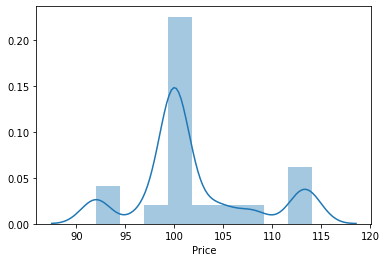

In [89]:
sns.distplot(df['Price'])

the net sales is highest when the price of the product F0306 is somewhere around 100 at site Ahmedabad

Hence the data is analysed for some​ good actionable insights which can increase their demand planning, warehouse planning, pricing of products which in turn can increase their revenue. However more detailed insights can be found by taking each and every sites and products based on requirement to have more granular level insights which i have done for site Ahmedabad and product F0306.